In [2]:
import numpy as np

import os, sys, traceback
import cPickle as pickle

%matplotlib inline
import matplotlib.pylab as plt

from sigvisa import Sigvisa

In [151]:
#with open("/home/dmoore/python/sigvisa/logs/mcmc/01357/step_000495/pickle.sg", 'rb') as f:
#    sg = pickle.load(f)
    
with open("/home/dmoore/python/sigvisa/logs/mcmc/01361/step_000498/pickle.sg", 'rb') as f:
    sg = pickle.load(f)

In [152]:
params = ["tt_residual", "peak_offset", "amp_transfer", "peak_decay", "coda_decay"]

fits = {}
for wn in sg.station_waves["ELK"]:
    for (eid, phase) in wn.arrivals():
        if phase=="UA": continue
        tmvals = sg.get_template_vals(eid, wn.sta, phase, wn.band, wn.chan)
        #tmvals, _ = wn.get_template_params_for_arrival(eid, phase)
        vs = [tmvals[p] for p in params]        
        
        if eid not in fits:
            fits[eid] = {}
        
        fits[eid][phase] = vs

fingerprints = []
eids = []
phases= ["Pg", "Lg"]
X = []
for eid in fits.keys():
    fingerprints.append(np.concatenate([fits[eid][phase] for phase in phases]))
    eids.append(eid)
    ev = sg.get_event(eid)
    X.append((ev.lon, ev.lat, ev.depth))
        
eids = np.array(eids)
X = np.array(X)

2.26874887671


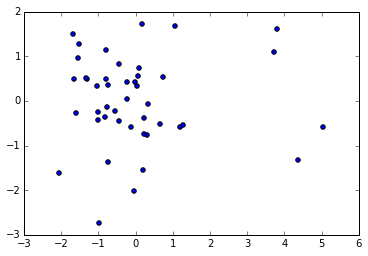

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(fingerprints).transform(fingerprints)
minComponent = np.min(np.diag(np.cov(X_r.T)))
print minComponent
X_r /= np.sqrt(minComponent)

plt.scatter(X_r[:, 0], X_r[:, 1])


In [154]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=.20)
clf.fit(fingerprints)
y_pred = clf.decision_function(fingerprints).ravel()
print eids[y_pred < 0]

[ 4 11 13 15 16 28 31 36 40]
